# Figure 2

Variation of the measurements depending on the parameter $k$. The value of the performance measures is presented for a model with memory 12 ($d\,{=}\,12$) in which we have varied the number of predictors $k$ in the set of values $\{1,3 ,6,9,12\}$. In the first panel from left to right the \texttt{Attendance} is presented, in the second the \texttt{Efficiency}, in the third the \texttt{Inaccuracy} and in the fourth the \texttt{Deviation}. Error bars represent a 95\% confidence interval.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from sim_utils import InteractiveBar
from data_utils import DataUtils
from config import PATHS

In [2]:
# ks = [1, 3]
# ds = [2, 4]
ks = [9, 12]
ds = [12, 24]
# ks = [1, 3, 6, 9, 12]
# ds = [2, 4, 6, 12, 24]

num_rounds = 10
num_episodes = 5

df = InteractiveBar.run_sweep(
    memories=ds,
    predictors=ks,
    num_experiments=num_episodes,
    num_agents=[100],
    threshold=0.6,
    num_rounds=[num_rounds]
).reset_index()
df['Model'] = df['Num_predictors']

df.head(2)

Running memory sweeps:   0%|          | 0/2 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/2 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/5 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/5 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/2 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/5 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/5 [00:00<?, ?it/s]

,index,Memory,Num_predictors,Identifier,Round,Agent,Decision,Score,Policy,Prediction,Inaccuracy,Model
0,0,12,9,0,0,0,0,0,10-cyclic-mirror,49,NaN,9
1,1,12,9,0,1,0,1,-1,1-cyclic,75,49.0,9


In [3]:
data = DataUtils.merge_models(df)
data.head(2)

,Model,Identifier,Efficiency,Inaccuracy,Attendance,Deviation
0,9,0,-0.100,35.953280,0.364,0.309839
1,9,1,-0.432,38.471663,0.638,0.345189


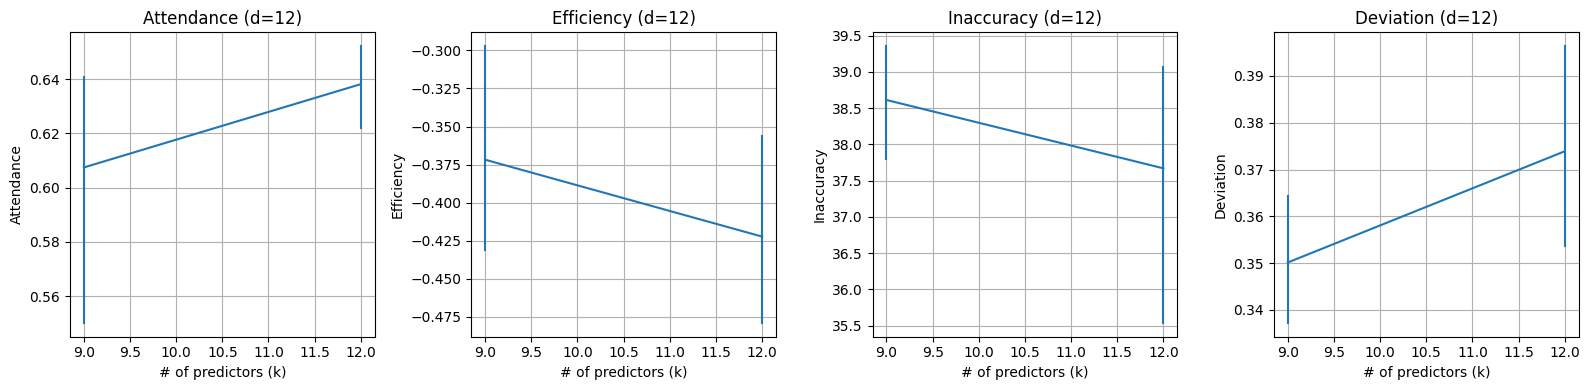

In [4]:
fig, ax = plt.subplots(
    1,4, 
    figsize=(16, 4), 
    tight_layout=True
)

variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']

for i, v in enumerate(variables):
    sns.lineplot(
        x='Model', y=v,
        data=data,
        ax=ax[i],
        err_style="bars",ci=95
    )
    ax[i].set_ylabel(v)
    ax[i].set_xlabel('# of predictors (k)')
    ax[i].set_title(v + ' (d=12)')
    ax[i].grid()

---